In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

C:\Users\VPL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import numpy as np

print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [3]:
print(np.min(test_targets))
print(np.mean(test_targets))
print(np.std(test_targets))
print(np.max(test_targets))


5.6
23.07843137254902
9.123806690181466
50.0


In [4]:
print(np.min(train_data, axis=0))
print(np.mean(train_data, axis=0))
print(np.std(train_data, axis=0))
print(np.max(train_data, axis=0))


[6.3200e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]
[9.22929073e+00 2.37382770e+01 6.80287253e+00 2.40939633e-01
 1.17147847e-01 7.08908627e-01 2.79060634e+01 2.02770050e+00
 8.68758849e+00 1.66168506e+02 2.19765689e+00 9.39946015e+01
 7.24556085e+00]
[ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


In [5]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
    
test_data -= mean
train_data -= mean

In [6]:
from keras import models, layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(
        64,
        activation='relu',
        input_shape=(train_data.shape[1],)
    ))
    model.add(layers.Dense(
        64,
        activation='relu'
    ))
    model.add(layers.Dense(1))
    model.compile(
        optimizer='rmsprop',
        loss='mse',
        metrics=['mae']        
    )
    return model

In [7]:
k=4
num_val_samples = len(train_data) // k
num_epochs = 100 # TODO. CHANGE TO 100
all_scores = []
all_history = []

for i in range(k):
    print('Fold:', str (i+1))
    
    model = build_model()
    model.summary()
    
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
        
    train_data_left = train_data[0:i * num_val_samples]
    train_data_right = train_data[(i+1) * num_val_samples:]
    partial_train_data = np.concatenate(
        [train_data_left, train_data_right],
        axis=0
    )
    print(partial_train_data.shape)
    train_targets_left = train_targets[0:i * num_val_samples]
    train_targets_right = train_targets[(i+1) * num_val_samples:]
    partial_train_targets = np.concatenate(
        [train_targets_left, train_targets_right],
        axis=0
    )

       
    history = model.fit(
        partial_train_data, partial_train_targets,
        epochs=num_epochs,
        batch_size=1,
#         verbose=0
        validation_data=(val_data, val_targets)
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets)
    print('val_mse', val_mse)
    print('val_mae', val_mae)
    
    

    model.save(str(i+1) +'-model.h5')
    
    all_scores.append(val_mae)
    all_history.append(history)
    

    

Fold: 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
(303, 13)
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 3ms/step - loss: 174.0993 - mean_absolute_error: 9.6636 - val_loss: 97.0926 - val_mean_absolute_error: 7.5336
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 137.0617 - mean_absolute_error: 8.5505 - val_loss: 95.5801 - val_mean_absolute_error: 7.6386
Epoc

303/303 [==============================] - 0s 1ms/step - loss: 36.7173 - mean_absolute_error: 4.1740 - val_loss: 28.7897 - val_mean_absolute_error: 3.4218
Epoch 46/100
303/303 [==============================] - 0s 1ms/step - loss: 36.7202 - mean_absolute_error: 4.2402 - val_loss: 30.5900 - val_mean_absolute_error: 3.3381
Epoch 47/100
303/303 [==============================] - 0s 1ms/step - loss: 34.9962 - mean_absolute_error: 3.9872 - val_loss: 32.7559 - val_mean_absolute_error: 3.9901
Epoch 48/100
303/303 [==============================] - 0s 1ms/step - loss: 36.5846 - mean_absolute_error: 4.1869 - val_loss: 52.6310 - val_mean_absolute_error: 4.8189
Epoch 49/100
303/303 [==============================] - 0s 1ms/step - loss: 35.6882 - mean_absolute_error: 4.0468 - val_loss: 31.9141 - val_mean_absolute_error: 3.3790
Epoch 50/100
303/303 [==============================] - 0s 1ms/step - loss: 35.1600 - mean_absolute_error: 4.0839 - val_loss: 28.2716 - val_mean_absolute_error: 3.1397
Epoch

Epoch 94/100
303/303 [==============================] - 0s 1ms/step - loss: 28.9837 - mean_absolute_error: 3.6771 - val_loss: 23.4256 - val_mean_absolute_error: 3.0404
Epoch 95/100
303/303 [==============================] - 0s 1ms/step - loss: 30.1643 - mean_absolute_error: 3.7162 - val_loss: 28.9834 - val_mean_absolute_error: 3.2756
Epoch 96/100
303/303 [==============================] - 0s 1ms/step - loss: 29.6192 - mean_absolute_error: 3.6237 - val_loss: 24.4926 - val_mean_absolute_error: 2.9654
Epoch 97/100
303/303 [==============================] - 0s 1ms/step - loss: 28.5623 - mean_absolute_error: 3.6931 - val_loss: 41.6176 - val_mean_absolute_error: 4.0556
Epoch 98/100
303/303 [==============================] - 0s 1ms/step - loss: 29.5543 - mean_absolute_error: 3.6697 - val_loss: 28.1630 - val_mean_absolute_error: 3.7047
Epoch 99/100
303/303 [==============================] - 0s 1ms/step - loss: 28.3066 - mean_absolute_error: 3.5850 - val_loss: 26.2217 - val_mean_absolute_error:

303/303 [==============================] - 0s 1ms/step - loss: 48.4439 - mean_absolute_error: 4.8635 - val_loss: 35.9397 - val_mean_absolute_error: 5.2347
Epoch 38/100
303/303 [==============================] - 0s 1ms/step - loss: 47.1496 - mean_absolute_error: 4.7938 - val_loss: 29.6833 - val_mean_absolute_error: 3.2266
Epoch 39/100
303/303 [==============================] - 0s 1ms/step - loss: 47.0978 - mean_absolute_error: 4.7721 - val_loss: 29.3189 - val_mean_absolute_error: 4.5851
Epoch 40/100
303/303 [==============================] - 0s 1ms/step - loss: 46.0161 - mean_absolute_error: 4.8688 - val_loss: 37.0714 - val_mean_absolute_error: 4.0840
Epoch 41/100
303/303 [==============================] - 0s 1ms/step - loss: 44.2957 - mean_absolute_error: 4.5233 - val_loss: 33.2015 - val_mean_absolute_error: 5.0742
Epoch 42/100
303/303 [==============================] - 0s 1ms/step - loss: 42.6772 - mean_absolute_error: 4.4627 - val_loss: 24.0430 - val_mean_absolute_error: 2.8943
Epoch

Epoch 86/100
303/303 [==============================] - 0s 1ms/step - loss: 34.4328 - mean_absolute_error: 3.8777 - val_loss: 32.6955 - val_mean_absolute_error: 5.1552
Epoch 87/100
303/303 [==============================] - 0s 1ms/step - loss: 32.1133 - mean_absolute_error: 3.7040 - val_loss: 56.0260 - val_mean_absolute_error: 6.6998
Epoch 88/100
303/303 [==============================] - 0s 1ms/step - loss: 32.2130 - mean_absolute_error: 3.7219 - val_loss: 16.6513 - val_mean_absolute_error: 2.8945
Epoch 89/100
303/303 [==============================] - 0s 1ms/step - loss: 33.9070 - mean_absolute_error: 3.8137 - val_loss: 15.9772 - val_mean_absolute_error: 3.1936
Epoch 90/100
303/303 [==============================] - 0s 1ms/step - loss: 33.2596 - mean_absolute_error: 3.8740 - val_loss: 37.0489 - val_mean_absolute_error: 5.4778
Epoch 91/100
303/303 [==============================] - 0s 1ms/step - loss: 33.7457 - mean_absolute_error: 3.7285 - val_loss: 12.6372 - val_mean_absolute_error:

303/303 [==============================] - 0s 1ms/step - loss: 44.2865 - mean_absolute_error: 4.6110 - val_loss: 29.6890 - val_mean_absolute_error: 3.9784
Epoch 30/100
303/303 [==============================] - 0s 1ms/step - loss: 42.3986 - mean_absolute_error: 4.5279 - val_loss: 28.1254 - val_mean_absolute_error: 3.4975
Epoch 31/100
303/303 [==============================] - 0s 1ms/step - loss: 42.3743 - mean_absolute_error: 4.5048 - val_loss: 31.6682 - val_mean_absolute_error: 4.2927
Epoch 32/100
303/303 [==============================] - 0s 1ms/step - loss: 42.9193 - mean_absolute_error: 4.7158 - val_loss: 47.6469 - val_mean_absolute_error: 5.8526
Epoch 33/100
303/303 [==============================] - 0s 1ms/step - loss: 43.9874 - mean_absolute_error: 4.6683 - val_loss: 41.2722 - val_mean_absolute_error: 5.3687
Epoch 34/100
303/303 [==============================] - 0s 1ms/step - loss: 43.1700 - mean_absolute_error: 4.6057 - val_loss: 206.3376 - val_mean_absolute_error: 13.6422
Epo

Epoch 78/100
303/303 [==============================] - 0s 1ms/step - loss: 27.9678 - mean_absolute_error: 3.6082 - val_loss: 48.5464 - val_mean_absolute_error: 5.2148
Epoch 79/100
303/303 [==============================] - 0s 1ms/step - loss: 27.5763 - mean_absolute_error: 3.5851 - val_loss: 25.1150 - val_mean_absolute_error: 3.1591
Epoch 80/100
303/303 [==============================] - 0s 1ms/step - loss: 29.8232 - mean_absolute_error: 3.6026 - val_loss: 29.6656 - val_mean_absolute_error: 3.4822
Epoch 81/100
303/303 [==============================] - 0s 1ms/step - loss: 28.6697 - mean_absolute_error: 3.7766 - val_loss: 23.7944 - val_mean_absolute_error: 3.2339
Epoch 82/100
303/303 [==============================] - 0s 1ms/step - loss: 29.2568 - mean_absolute_error: 3.6924 - val_loss: 25.3734 - val_mean_absolute_error: 3.4659
Epoch 83/100
303/303 [==============================] - 0s 1ms/step - loss: 29.5417 - mean_absolute_error: 3.6008 - val_loss: 23.3029 - val_mean_absolute_error:

303/303 [==============================] - 0s 1ms/step - loss: 53.9754 - mean_absolute_error: 5.1933 - val_loss: 75.2810 - val_mean_absolute_error: 5.3790
Epoch 22/100
303/303 [==============================] - 0s 1ms/step - loss: 51.2213 - mean_absolute_error: 5.0426 - val_loss: 66.8548 - val_mean_absolute_error: 5.8943
Epoch 23/100
303/303 [==============================] - 0s 1ms/step - loss: 51.5183 - mean_absolute_error: 5.0865 - val_loss: 70.7228 - val_mean_absolute_error: 5.2882
Epoch 24/100
303/303 [==============================] - 0s 1ms/step - loss: 48.7147 - mean_absolute_error: 4.8550 - val_loss: 64.4036 - val_mean_absolute_error: 5.2984
Epoch 25/100
303/303 [==============================] - 0s 1ms/step - loss: 49.4170 - mean_absolute_error: 4.9924 - val_loss: 66.1168 - val_mean_absolute_error: 6.1858
Epoch 26/100
303/303 [==============================] - 0s 1ms/step - loss: 48.3720 - mean_absolute_error: 4.7715 - val_loss: 79.3999 - val_mean_absolute_error: 5.5150
Epoch

Epoch 70/100
303/303 [==============================] - 0s 1ms/step - loss: 30.1783 - mean_absolute_error: 3.6904 - val_loss: 38.6541 - val_mean_absolute_error: 3.7556
Epoch 71/100
303/303 [==============================] - 0s 1ms/step - loss: 28.9031 - mean_absolute_error: 3.6466 - val_loss: 34.3577 - val_mean_absolute_error: 3.6322
Epoch 72/100
303/303 [==============================] - 0s 1ms/step - loss: 29.5783 - mean_absolute_error: 3.5565 - val_loss: 40.8133 - val_mean_absolute_error: 3.8398
Epoch 73/100
303/303 [==============================] - 0s 1ms/step - loss: 28.3023 - mean_absolute_error: 3.5144 - val_loss: 34.2570 - val_mean_absolute_error: 3.5436
Epoch 74/100
303/303 [==============================] - 0s 1ms/step - loss: 29.8046 - mean_absolute_error: 3.6041 - val_loss: 32.3717 - val_mean_absolute_error: 3.7548
Epoch 75/100
303/303 [==============================] - 0s 1ms/step - loss: 28.9476 - mean_absolute_error: 3.4851 - val_loss: 37.9167 - val_mean_absolute_error:

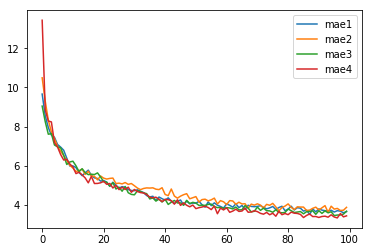

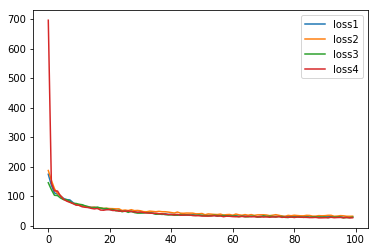

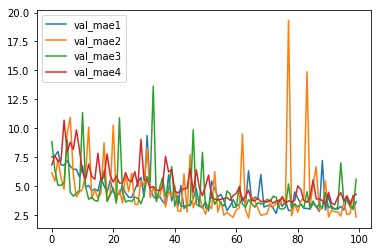

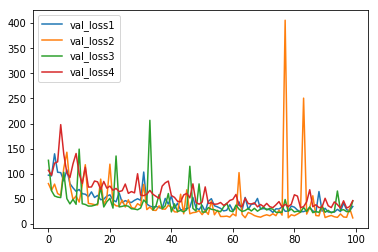

In [10]:
import matplotlib.pyplot as plt

for i in range(k):
    plt.plot(all_history[i].history['mean_absolute_error'], label='mae' + str(i+1))
#     plt.plot(all_history[i].history['val_mean_absolute_error'], label='val_mae')
plt.legend()
plt.show()
plt.close()

for i in range(k):
    plt.plot(all_history[i].history['loss'], label='loss' + str(i+1))
#     plt.plot(all_history[i].history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

for i in range(k):
#     plt.plot(all_history[i].history['mean_absolute_error'][15:], label='mae')
    plt.plot(all_history[i].history['val_mean_absolute_error'], label='val_mae' + str(i+1))
plt.legend()
plt.show()
plt.close()

for i in range(k):
#     plt.plot(all_history[i].history['loss'][15:], label='loss')
    plt.plot(all_history[i].history['val_loss'], label='val_loss' + str(i+1))
plt.legend()
plt.show()
plt.close()


In [9]:
model = models.load_model('1-model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
